In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [120]:
df=pd.read_csv(r"D:\College\BTech\SEM-2\Project\PrediQT\car_dataset_india_2016_2017.csv")

In [121]:
df

,OEM,MODEL,BODY TYPE,PRICE IN LAKHS,YEAR,MONTH,SALE
0,Datsun,Go,Hatchback,4.03,2016,1,673.0
1,Datsun,Go Plus,MUV,4.26,2016,1,740.0
2,Datsun,RediGo,Hatchback,3.98,2016,1,NaN
3,Fiat,"Evo, Avventura",Hatchback,6.57,2016,1,520.0
4,Fiat,Linea,Sedan,7.19,2016,1,93.0
...,...,...,...,...,...,...,...
1687,Toyota,Innova,MUV,17.30,2017,12,5947.0
1688,Toyota,Landcruiser,SUV,147.00,2017,12,13.0
1689,Toyota,"Liva, Cross",Hatchback,5.68,2017,12,1209.0
1690,Volkswagen,Polo,Hatchback,6.49,2017,12,1569.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OEM             1692 non-null   object 
 1   MODEL           1692 non-null   object 
 2   BODY TYPE       1692 non-null   object 
 3   PRICE IN LAKHS  1692 non-null   float64
 4   YEAR            1692 non-null   int64  
 5   MONTH           1692 non-null   int64  
 6   SALE            1628 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 92.7+ KB


In [123]:
df['PRICE IN LAKHS'].describe()

count    1692.000000
mean       12.972766
std        19.431959
min         2.050000
25%         5.570000
50%         7.280000
75%        13.000000
max       147.000000
Name: PRICE IN LAKHS, dtype: float64

In [124]:
df.shape

(1692, 7)

Check for Missing values

In [125]:
df.isnull().sum()

OEM                0
MODEL              0
BODY TYPE          0
PRICE IN LAKHS     0
YEAR               0
MONTH              0
SALE              64
dtype: int64

Replace the missing values

In [126]:
df["SALE"].fillna(0, inplace=True)

In [127]:
df.isnull().sum()

OEM               0
MODEL             0
BODY TYPE         0
PRICE IN LAKHS    0
YEAR              0
MONTH             0
SALE              0
dtype: int64

In [128]:
df.duplicated().sum()

0

Correlation between PRICE and SALE

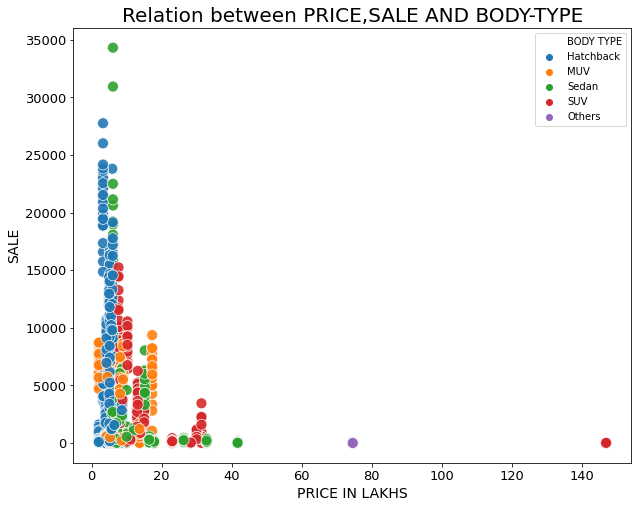

In [129]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='PRICE IN LAKHS', y='SALE',hue='BODY TYPE',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('PRICE IN LAKHS',fontsize=14)
plt.ylabel('SALE',fontsize=14)
plt.title('Relation between PRICE,SALE AND BODY-TYPE',fontsize=20);

In [130]:
df['BODY TYPE'].value_counts()

Hatchback    576
Sedan        480
SUV          348
MUV          264
Others        24
Name: BODY TYPE, dtype: int64

In [131]:
df['MODEL'].value_counts()

Tigor           24
Jazz            24
CRV             24
Elantra         24
Verito, Vibe    24
                ..
Elite i20       24
Superb          24
Creta           24
City            24
WRV             12
Name: MODEL, Length: 71, dtype: int64

Correlation between variables

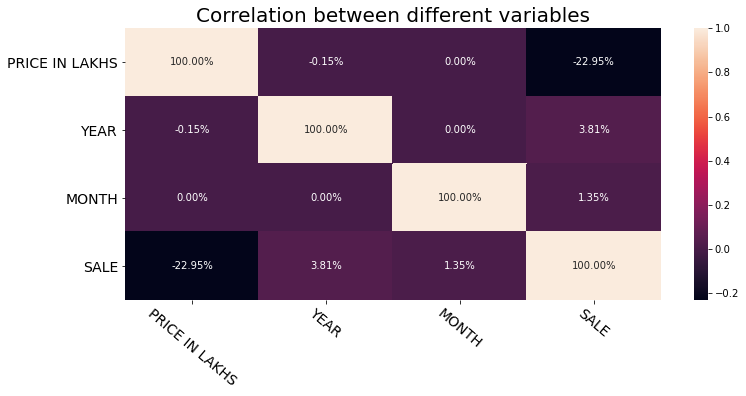

In [132]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.title('Correlation between different variables',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

In [133]:
md = df

In [134]:
x = md.drop(columns=['SALE'],axis=1)
y = md['SALE']

In [135]:
x

,OEM,MODEL,BODY TYPE,PRICE IN LAKHS,YEAR,MONTH
0,Datsun,Go,Hatchback,4.03,2016,1
1,Datsun,Go Plus,MUV,4.26,2016,1
2,Datsun,RediGo,Hatchback,3.98,2016,1
3,Fiat,"Evo, Avventura",Hatchback,6.57,2016,1
4,Fiat,Linea,Sedan,7.19,2016,1
...,...,...,...,...,...,...
1687,Toyota,Innova,MUV,17.30,2017,12
1688,Toyota,Landcruiser,SUV,147.00,2017,12
1689,Toyota,"Liva, Cross",Hatchback,5.68,2017,12
1690,Volkswagen,Polo,Hatchback,6.49,2017,12


In [136]:
y

0        673.0
1        740.0
2          0.0
3        520.0
4         93.0
         ...  
1687    5947.0
1688      13.0
1689    1209.0
1690    1569.0
1691     548.0
Name: SALE, Length: 1692, dtype: float64

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [138]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [139]:
#model training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [140]:
ohe= OneHotEncoder()
ohe.fit(x[['OEM','MODEL','BODY TYPE']])

OneHotEncoder()

In [141]:
col_trans= make_column_transformer((OneHotEncoder(categories=ohe.categories_),['OEM','MODEL','BODY TYPE']),remainder='passthrough')

Linear Regression

In [142]:
lr = LinearRegression()

In [143]:
lr_pipe = make_pipeline(col_trans,lr)

In [144]:
lr_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Datsun', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Mahindra',
       'Maruti Suzuki', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen'], dtype=object),
                                                                            array(['Alto', 'Amaze', 'Aspire', 'BRV', 'Baleno', 'Bolero', 'Bolt',
       'Brio',...
       'Rapid', 'RediGo', 'S-Cross', 'Safari, Storme', 'Scorpio', 'Sumo',
       'Sunny', 'Superb', 'Swift', 'TUV300', 'Terrano', 'Tiago', 'Tigor',
       'Tucson', 'Vento', 'Verito, Vibe', 'Verna', 'Vitara Brezza', 'WRV',
       'WagonR', 'XUV500', 'Xcent', 'Xylo', 'Zest', 'Еесо'], dtype=object),
                                                                            array(['Hatchback', 'MUV', 'Others', 'SUV', 'Se

In [145]:
y_pred=lr_pipe.predict(x_test)

In [146]:
scores=[]
for i in range(1000):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=i)
    lr= LinearRegression()
    lr_pipe = make_pipeline(col_trans,lr)
    lr_pipe.fit(x_train, y_train)
    y_pred=lr_pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [147]:
np.argmax(scores)

390

In [148]:
scores[np.argmax(scores)]

0.9545226442479503

In [149]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=np.argmax(scores))
lr= LinearRegression()
lr_pipe = make_pipeline(col_trans,lr)
lr_pipe.fit(x_train, y_train)
y_pred=lr_pipe.predict(x_test)
r2_lr=r2_score(y_test,y_pred)

RandomForest Regressor

In [150]:
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [151]:
rfr_pipe = make_pipeline(col_trans,rfr)

In [152]:
rfr_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Datsun', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Mahindra',
       'Maruti Suzuki', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen'], dtype=object),
                                                                            array(['Alto', 'Amaze', 'Aspire', 'BRV', 'Baleno', 'Bolero', 'Bolt',
       'Brio',...
       'Sunny', 'Superb', 'Swift', 'TUV300', 'Terrano', 'Tiago', 'Tigor',
       'Tucson', 'Vento', 'Verito, Vibe', 'Verna', 'Vitara Brezza', 'WRV',
       'WagonR', 'XUV500', 'Xcent', 'Xylo', 'Zest', 'Еесо'], dtype=object),
                                                                            array(['Hatchback', 'MUV', 'Others', 'SUV', 'Sedan'], dtype=object)]),
                                                  

In [153]:
y_pred=rfr_pipe.predict(x_test)

In [154]:
scores=[]
for i in range(1000):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=i)
    rfr=RandomForestRegressor(n_estimators = 10)
    rfr_pipe = make_pipeline(col_trans,rfr)
    rfr_pipe.fit(x_train, y_train)
    y_pred=rfr_pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [155]:
np.argmax(scores)

390

In [156]:
scores[np.argmax(scores)]

0.9725927366461697

In [157]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=np.argmax(scores))
rfr=RandomForestRegressor(n_estimators = 10)
rfr_pipe = make_pipeline(col_trans,rfr)
rfr_pipe.fit(x_train, y_train)
y_pred=rfr_pipe.predict(x_test)
r2_rfr=r2_score(y_test,y_pred)
r2_rfr

0.9724370250977274

DecisionTree Regressor

In [158]:
dtr = DecisionTreeRegressor(random_state = 0)

In [159]:
dtr_pipe = make_pipeline(col_trans,dtr)

In [160]:
dtr_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Datsun', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Mahindra',
       'Maruti Suzuki', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen'], dtype=object),
                                                                            array(['Alto', 'Amaze', 'Aspire', 'BRV', 'Baleno', 'Bolero', 'Bolt',
       'Brio',...
       'Rapid', 'RediGo', 'S-Cross', 'Safari, Storme', 'Scorpio', 'Sumo',
       'Sunny', 'Superb', 'Swift', 'TUV300', 'Terrano', 'Tiago', 'Tigor',
       'Tucson', 'Vento', 'Verito, Vibe', 'Verna', 'Vitara Brezza', 'WRV',
       'WagonR', 'XUV500', 'Xcent', 'Xylo', 'Zest', 'Еесо'], dtype=object),
                                                                            array(['Hatchback', 'MUV', 'Others', 'SUV', 'Se

In [161]:
y_pred=dtr_pipe.predict(x_test)

In [162]:
scores=[]
for i in range(1000):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=i)
    dtr = DecisionTreeRegressor(random_state = 0)
    dtr_pipe = make_pipeline(col_trans,dtr)
    dtr_pipe.fit(x_train, y_train)
    y_pred=dtr_pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [163]:
np.argmax(scores)

839

In [164]:
scores[np.argmax(scores)]

0.9627870420768044

In [165]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=np.argmax(scores))
dtr = DecisionTreeRegressor(random_state = 0)
dtr_pipe = make_pipeline(col_trans,dtr)
dtr_pipe.fit(x_train, y_train)
y_pred=dtr_pipe.predict(x_test)
r2_dtr=r2_score(y_test,y_pred)
r2_dtr

0.9627870420768044

In [166]:
from tabulate import tabulate

In [167]:
table = []
table.append(['Sr.No.', 'Regression Model', 'R-squared value'])
table.append(['1', 'Linear Regression', r2_lr])
table.append(['2', 'Decision Tree Regression', r2_dtr])
table.append(['3', 'Random Forest Regression', r2_rfr])

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════╤══════════════════════════╤═══════════════════╕
│   Sr.No. │ Regression Model         │   R-squared value │
╞══════════╪══════════════════════════╪═══════════════════╡
│        1 │ Linear Regression        │          0.954523 │
├──────────┼──────────────────────────┼───────────────────┤
│        2 │ Decision Tree Regression │          0.962787 │
├──────────┼──────────────────────────┼───────────────────┤
│        3 │ Random Forest Regression │          0.972437 │
╘══════════╧══════════════════════════╧═══════════════════╛


In [168]:
var1 = lr_pipe.predict(pd.DataFrame([['Skoda','Octavia','Sedan',26.29,2018,2]],columns=['OEM','MODEL','BODY TYPE','PRICE IN LAKHS','YEAR','MONTH']))
var2 = dtr_pipe.predict(pd.DataFrame([['Skoda','Octavia','Sedan',26.29,2018,2]],columns=['OEM','MODEL','BODY TYPE','PRICE IN LAKHS','YEAR','MONTH']))
var3 = rfr_pipe.predict(pd.DataFrame([['Skoda','Octavia','Sedan',26.29,2018,2]],columns=['OEM','MODEL','BODY TYPE','PRICE IN LAKHS','YEAR','MONTH']))

In [169]:
print("Sales Prediction of Maruti Suzuki Swift in January 2018 is - ")
print("By Linear Regression Model : --------",int(var1))
print("By Decision Tree Regression Model :--",int(var2))
print("By Random Forest Regression Model :--",int(var3))

Sales Prediction of Maruti Suzuki Swift in January 2018 is - 
By Linear Regression Model : -------- 666
By Decision Tree Regression Model :-- 193
By Random Forest Regression Model :-- 177


In [170]:
import pickle

In [171]:

pickle.dump(rfr_pipe,open('prediqt.pkl','wb'))